# Logistic Regression - Multinomial Classification

### Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler


### Reading the dataset

In [4]:
dataset = pd.read_csv('C:/Users/hassa/OneDrive/Desktop/VI sem/ML/lab-external/dataset/Logistic_Iris.csv')

### defining x and y

In [5]:
x = dataset.iloc[:,[0,1,2,3]].values

In [6]:
y = dataset.iloc[:,4].values

### Splitting the dataset

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

### Standardizing the input

In [10]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

### Initializing the classifier and fitting the training data on it

In [11]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

### Checking classes predicted 

In [15]:
classifier.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Intercept of the LogisticRegression

In [13]:
classifier.intercept_

array([-0.42098126,  1.77047957, -1.34949831])

### Coefficient

In [16]:
classifier.coef_

array([[-1.02109827,  1.04251016, -1.7790278 , -1.66102155],
       [ 0.54183308, -0.35994548, -0.26906514, -0.7168076 ],
       [ 0.47926519, -0.68256468,  2.04809293,  2.37782915]])

### Score 

In [17]:
classifier.score(xtest,ytest)

0.9736842105263158

### Predicted values

In [18]:
ypred = classifier.predict(xtest)

### Accuracy Score

In [19]:
acc = accuracy_score(ytest, ypred) * 100
acc

97.36842105263158

### Confusion Matrix

In [20]:
cm = confusion_matrix(ytest, ypred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

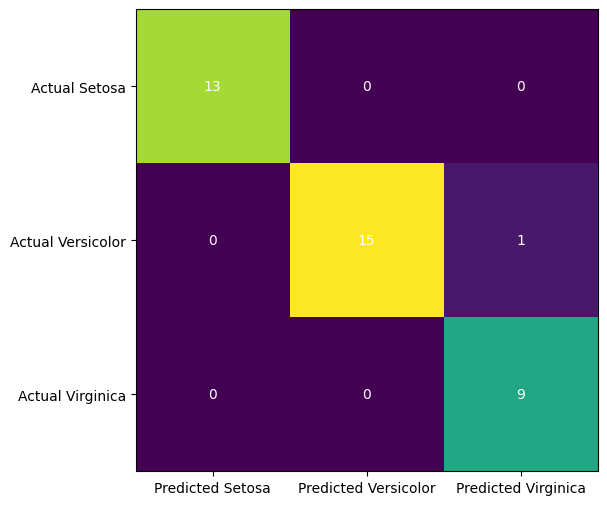

In [21]:
fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted Setosa','Predicted Versicolor', 'Predicted Virginica'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual Setosa', 'Actual Versicolor', 'Actual Virginica'))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center',color='white')
ax.set_ylim(2.5,-0.5)
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_21260\60491212.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xset[yset == j,0], xset[yset == j,1], c=ListedColormap(('red','green','blue'))(i), label = j)


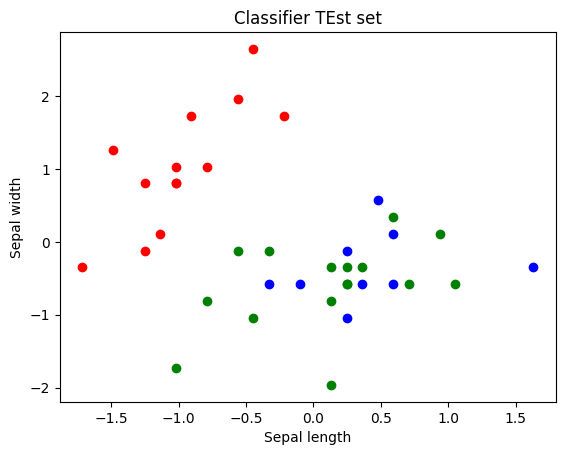

In [24]:
xset, yset = xtest, ytest
for i, j in enumerate(np.unique(ytest)):
    plt.scatter(xset[yset == j,0], xset[yset == j,1], c=ListedColormap(('red','green','blue'))(i), label = j)

plt.title('Classifier TEst set')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [23]:
from matplotlib.colors import ListedColormap